<a href="https://colab.research.google.com/github/micah-shull/Statistics/blob/main/Statistics_22_hypothesis_testing_CalHousing_one_sample_t_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **Data Requirements for One-Sample T-Test**
- **What You Need**:
  - **A sample distribution**: You need the actual sample data (not just the mean) to compute the sample mean and standard deviation.
  - **A population mean**: You need the known or hypothesized population mean to compare your sample against.
- **What You Don’t Need**:
  - You don’t need the actual population data or distribution—only the population mean.

---

### **What Happens in a One-Sample T-Test**
The test determines whether the sample mean is significantly different from the known or hypothesized population mean .

1. **Hypotheses**:
   - **Null Hypothesis (\( H_0 \))**: The sample mean equals the population mean.
   - **Alternative Hypothesis (\( H_1 \))**: The sample mean is not equal to the population mean.

2. **Logic**:
   - The test assumes that the population has a normal distribution or the sample size is large enough for the Central Limit Theorem to hold.
   - Using the sample mean, standard deviation, and size, the t-test compares the difference between the sample and population mean to the variability of the sample.

---

### **Key Data Difference: One-Sample vs. Two-Sample**
| **Feature**              | **One-Sample T-Test**                                 | **Two-Sample T-Test**                                |
|--------------------------|------------------------------------------------------|----------------------------------------------------|
| **Population Info**      | You need the population mean but not the distribution. | No population info is needed. Both samples are independent and directly compared. |
| **Data Available**       | A single sample with observed data and its statistics (e.g., mean, std dev). | Two independent samples with observed data and their respective statistics. |
| **Hypothesis Question**  | "Does my sample come from a population with mean?" | "Are the means of these two independent groups significantly different?" |

---

### Why Don’t We Need the Population Distribution in a One-Sample T-Test?

The **one-sample t-test** assumes:
- The population mean is known or hypothesized (e.g., from prior research or benchmarks).
- If we had the population distribution or data, we wouldn’t need the t-test at all because we could directly compare our sample to the full population!

Instead, the **one-sample t-test** is used to test whether a sample (a smaller subset of data) is consistent with the population mean.

---

### Real-World Example to Clarify

#### **One-Sample T-Test Example**
- You’re a marketing analyst who wants to test whether the average daily sales in your region differ from the company-wide average, which is reported to be \$500.
- You collect a sample of daily sales data from your region (e.g., \( n = 30 \) days).
- Using the sample mean, standard deviation, and size, the t-test evaluates whether your regional sales differ significantly from $500.

Here:
- You have the **sample data** but only the **population mean** ($500), not the full population data.

---

#### **Two-Sample T-Test Example**
- You want to compare the average daily sales between two regions (e.g., Region A and Region B).
- You collect a sample of daily sales data from both regions.
- Using the sample means, standard deviations, and sizes, the t-test evaluates whether the two regions have significantly different sales.

Here:
- You don’t need any population data—just the two independent samples.

---

### Why Use a One-Sample T-Test?
A **one-sample t-test** is valuable when:
- You have a benchmark or prior knowledge of the population mean but no access to the full population data.
- You want to determine whether your sample is consistent with or significantly different from the assumed population.

By contrast, a **two-sample t-test** is about comparing **two groups** without relying on any population mean or external benchmark. Both tests address different types of questions but use similar statistical principles.

### Load Calfiornia Housing Data

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load California Housing dataset from sklearn
california_data = fetch_california_housing(as_frame=True)

# Convert to DataFrame
data = california_data.frame

# Display dataset information
print("California Housing Dataset Info:")
data.info()

California Housing Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### Remove Outliers

In [2]:
# Function to remove outliers based on IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Apply the function to each column
df = data.copy()
for column in ['AveBedrms', 'AveRooms', 'AveOccup']:
    df = remove_outliers_iqr(df, column)

### Data Distribution Plots


Unique Values in Numeric Columns:
AveBedrms: 12617 unique values
AveOccup: 16948 unique values
AveRooms: 17341 unique values
HouseAge: 52 unique values
MedHouseVal: 3787 unique values
MedInc: 11988 unique values
Population: 3689 unique values


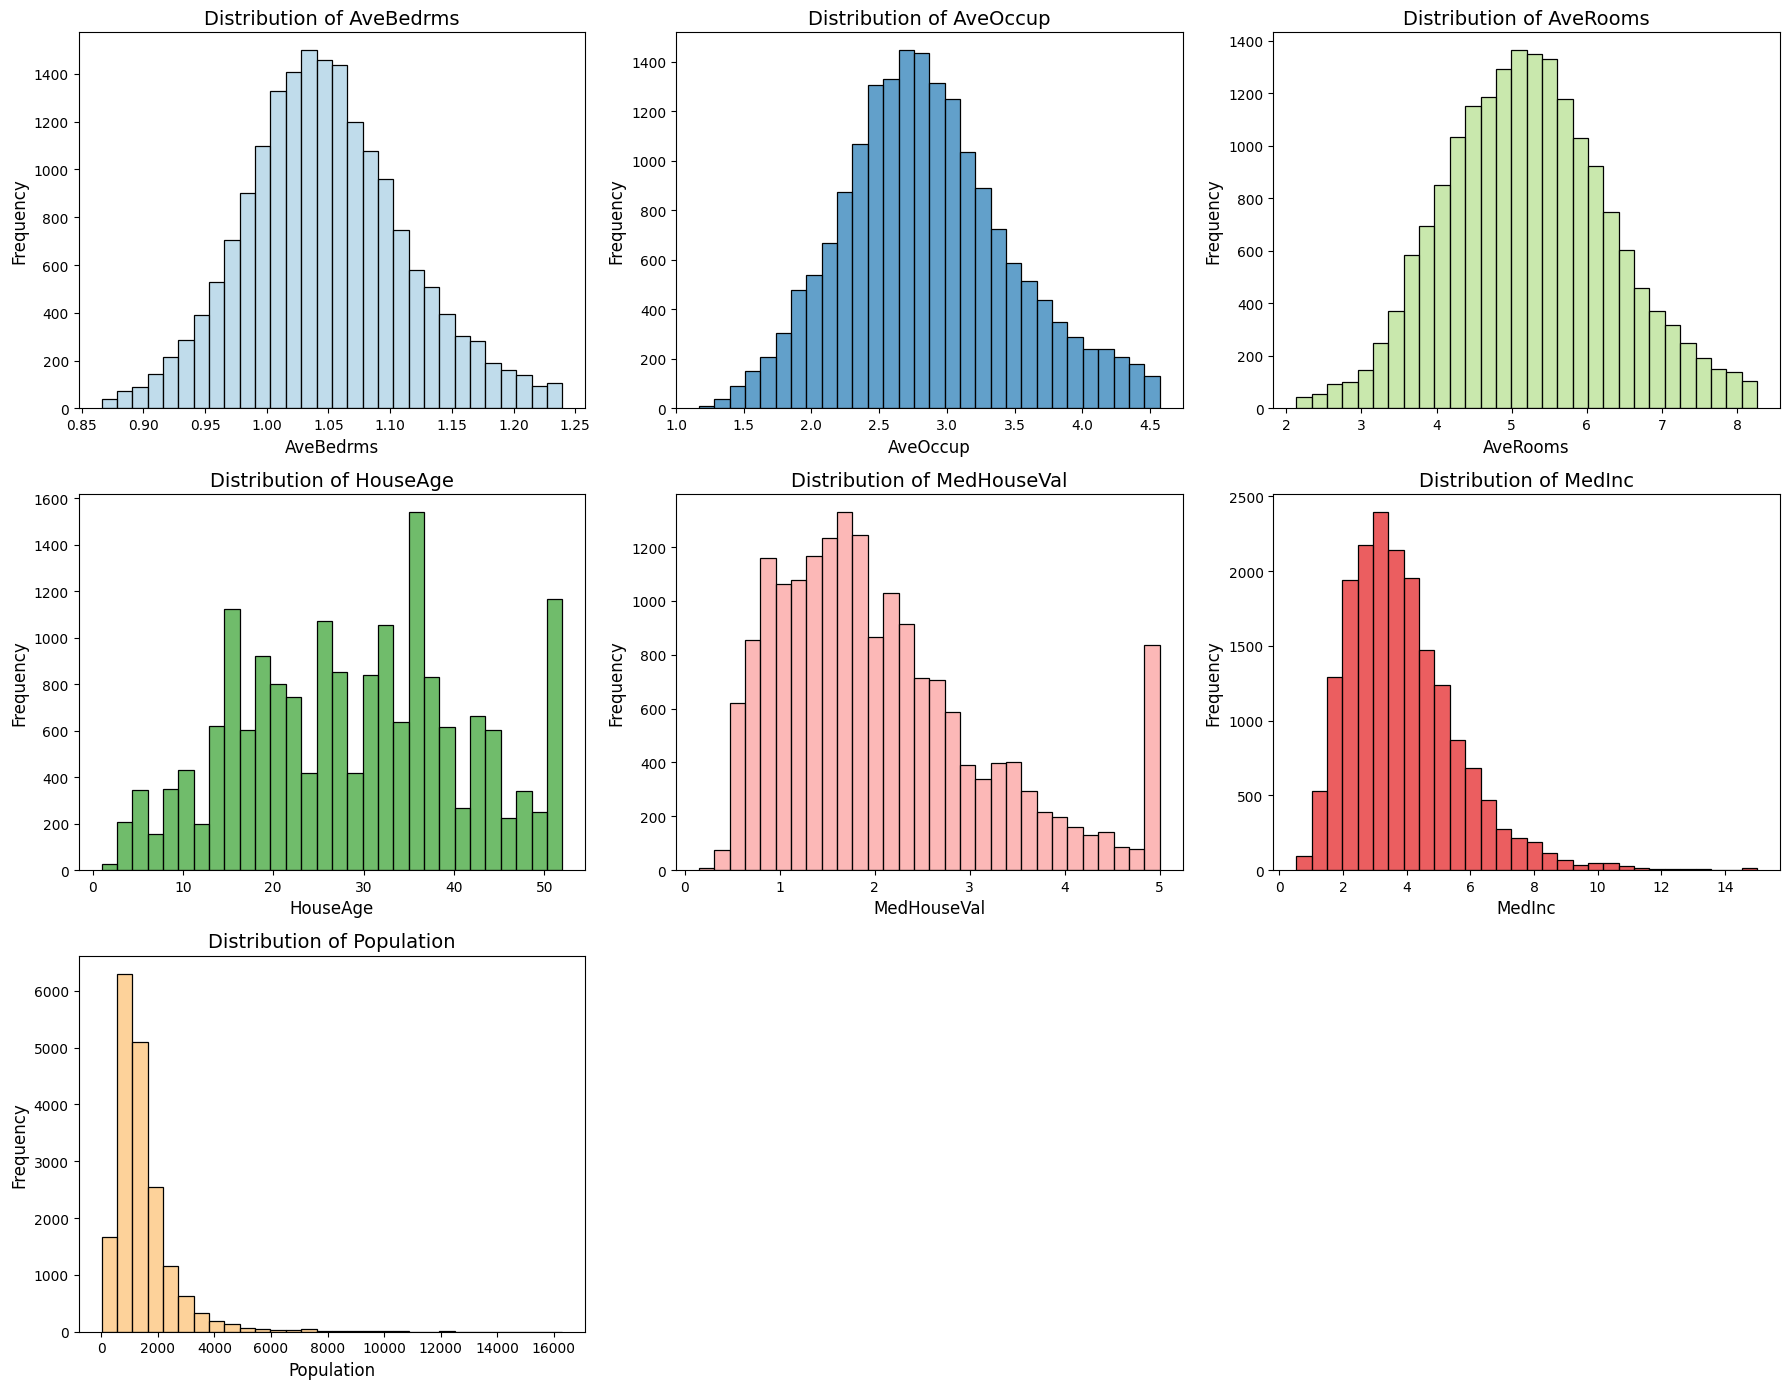

In [3]:
# Exclude 'longitude' and 'latitude' from analysis
numeric_columns = df.select_dtypes(include='number').columns.difference(['Longitude', 'Latitude'])

# Define a color palette for the plots
colors = sns.color_palette("Paired", n_colors=len(numeric_columns))

# Step 1: Count unique values for each numeric column
print("\nUnique Values in Numeric Columns:")
for col in numeric_columns:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")

# Step 2: Visualize distributions of numeric columns
plt.figure(figsize=(18, 14))
for i, (col, color) in enumerate(zip(numeric_columns, colors), 1):
    plt.subplot(3, 3, i)  # Create a 3x3 grid to fit all plots
    sns.histplot(df[col], kde=False, bins=30, color=color, edgecolor="k", alpha=0.7)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)

# Final adjustments for the layout
plt.tight_layout()
plt.show()

In [ ]:
# Step 3: Summary statistics for numeric columns
print("\nSummary Statistics for Numeric Columns:")
df[numeric_columns].describe()


Summary Statistics for Numeric Columns:


,AveBedrms,AveOccup,AveRooms,HouseAge,MedHouseVal,MedInc,Population
count,18328.000000,18328.000000,18328.000000,18328.000000,18328.000000,18328.000000,18328.000000
mean,1.047894,2.857270,5.226310,28.939110,2.086778,3.876322,1453.909265
std,0.065961,0.627722,1.106589,12.478099,1.128159,1.752153,1079.391454
min,0.866013,1.169329,2.133929,1.000000,0.149990,0.536000,5.000000
25%,1.004115,2.430380,4.446320,19.000000,1.237000,2.614850,825.000000
50%,1.044304,2.809473,5.191014,29.000000,1.844000,3.594050,1193.000000
75%,1.088504,3.237311,5.950209,37.000000,2.665250,4.793225,1747.250000
max,1.239521,4.571046,8.263251,52.000000,5.000010,15.000100,16305.000000



### Understanding the Sample and Population in One-Sample T-Tests

When performing a one-sample t-test, it is crucial to understand the distinction between the **sample** and the **population**, and how these concepts apply to our dataset.

#### The Sample
The **sample** refers to the actual data that we have collected and are analyzing. In our case, this is the data from the California Housing dataset. For example:
- The `AveBedrms` column contains the average number of bedrooms for each block group (our "sample").
- The `MedHouseVal` column contains the median house value for each block group (another "sample").

These data points represent a subset of all possible housing data across California. In many real-world scenarios, we rarely have access to the full **population** data because it is either too large or impractical to collect.

#### The Population
The **population** refers to the entire group we are making inferences about. Since we don't have access to all housing data across California, we use a hypothetical or known value to represent the **population mean**. For example:
- When testing if the average number of bedrooms is equal to `1.0`, the value `1.0` is our hypothesized **population mean**.
- Similarly, when testing if the average median income differs from `$4,000`, the value `$4,000` acts as our **population mean**.

This hypothesized population mean comes from domain knowledge, a research question, or a benchmark we are testing against. In our case, these values are chosen for demonstration and hypothesis testing purposes.

#### The Goal of the One-Sample T-Test
The one-sample t-test evaluates whether the mean of the sample data is significantly different from the hypothesized population mean. Specifically, it answers:
- "Is the sample mean close enough to the hypothesized population mean to assume no difference?"
- Or, conversely: "Is the difference between the sample mean and hypothesized population mean large enough to be statistically significant?"

#### Why We Use a Hypothesized Population Mean
In many practical cases, we don't have access to the actual population data. Instead, we use:
1. A **known population mean** if it is available (e.g., published statistics).
2. A **hypothesized mean** based on research, domain knowledge, or a meaningful benchmark (as in our examples).

#### Example: Average Number of Bedrooms
In the test where we evaluate if the average number of bedrooms differs significantly from `1.0`:
- **Sample**: The `AveBedrms` column (actual data from 18,328 block groups).
- **Population**: The hypothesized mean of `1.0`, which we assume represents the broader population.

The t-test compares the mean of the sample data (`AveBedrms`) to this hypothesized population mean (`1.0`) and determines if the difference is statistically significant.



## Question:
###Is the average median income in this dataset significantly different from $40,000?


#### Interpretation:
The one-sample T-test reveals a **T-statistic of -9.56** and a **P-value of 0.0000**, which is far below the significance level (\(\alpha = 0.05\)). This result leads us to **reject the null hypothesis (H0)** and conclude that the average median income in the dataset is significantly different from $40,000.

The negative T-statistic indicates that the sample mean is less than \$40,000 Dollars, aligning with the visualization where the sample mean (black solid line) is clearly below the population mean of $40,000 (blue dashed line).


Hypotheses:
H0: The average median income is $40,000.
HA: The average median income is not $40,000.


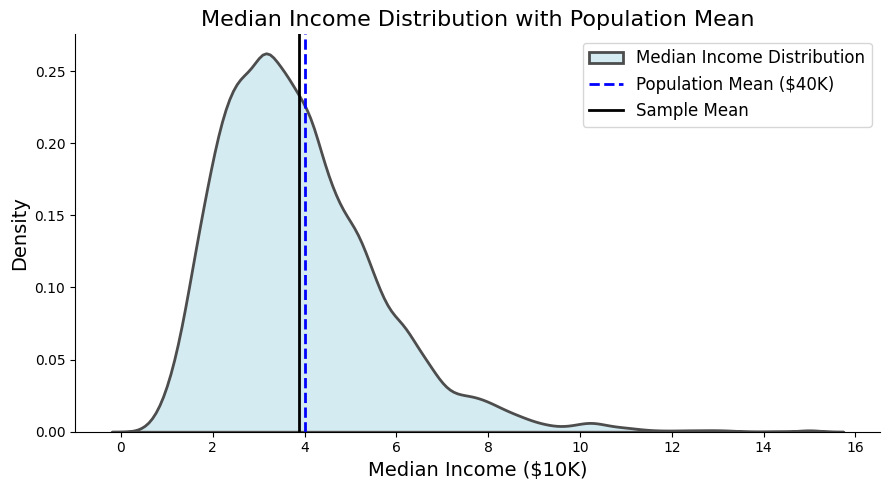


One-Sample T-Test Results for Median Income:
T-Statistic: -9.56
P-Value: 0.0000
Conclusion: Reject H0. The average median income is significantly different from $40000.


In [6]:
from scipy.stats import ttest_1samp

# Define the sample data and population mean
sample_data = df['MedInc']
population_mean = 4.0

# Hypotheses
print("Hypotheses:")
print("H0: The average median income is $40,000.")
print("HA: The average median income is not $40,000.")

# Visualization: KDE Plot with Population Mean
plt.figure(figsize=(9, 5))
sns.kdeplot(sample_data, fill=True, alpha=0.5, color="lightblue", linewidth=2, edgecolor="0.3", label="Median Income Distribution")
plt.axvline(population_mean, color="blue", linestyle="--", linewidth=2, label="Population Mean ($40K)")
plt.axvline(sample_data.mean(), color="k", linestyle="-", linewidth=2, label="Sample Mean")
plt.title("Median Income Distribution with Population Mean", fontsize=16)
plt.xlabel("Median Income ($10K)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

# Perform the one-sample t-test
t_stat, p_value = ttest_1samp(sample_data, population_mean)

# Print the results
print("\nOne-Sample T-Test Results for Median Income:")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Conclusion based on significance level
alpha = 0.05
if p_value < alpha:
    print(f"Conclusion: Reject H0. The average median income is significantly different from ${population_mean*10000:.0f}.")
else:
    print(f"Conclusion: Fail to reject H0. The average median income is not significantly different from ${population_mean*10000:.0f}.")


## Question:
### Is the average number of rooms in homes significantly different from 6?

#### Interpretation of Results:

1. **T-Statistic**:
   - The T-statistic is **-94.65**, indicating that the sample mean is far below the population mean of 6. The negative sign reflects that the **sample mean is smaller than 6**.
   - This large magnitude (absolute value) of the T-statistic indicates a very substantial difference between the sample mean and the hypothesized population mean.

2. **P-Value**:
   - The P-value is **0.0000**, which is far below the typical significance threshold of 0.05.
   - This provides very strong evidence to **reject the null hypothesis (H0)**.

3. **Conclusion**:
   - We can confidently conclude that the average number of rooms in homes is significantly different from 6.
   - Based on the negative T-statistic, we can infer that the sample mean is **lower than 6**.


Hypotheses:
H0: The average number of rooms is 6.
HA: The average number of rooms is not 6.


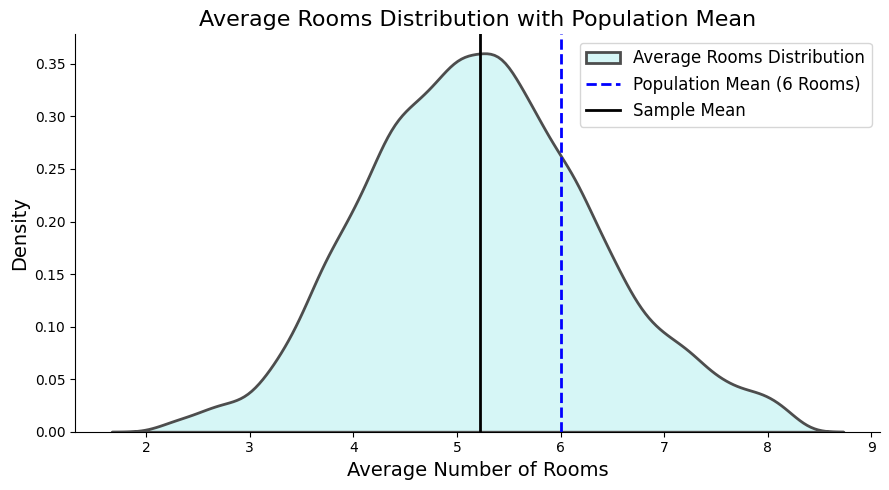


One-Sample T-Test Results for Average Number of Rooms:
T-Statistic: -94.65
P-Value: 0.0000
Conclusion: Reject H0. The average number of rooms is significantly different from 6.


In [7]:
# Define the sample data and population mean
sample_data = df['AveRooms']
population_mean = 6.0

# Hypotheses
print("Hypotheses:")
print("H0: The average number of rooms is 6.")
print("HA: The average number of rooms is not 6.")

# Visualization: KDE Plot with Population Mean
plt.figure(figsize=(9,5))
sns.kdeplot(sample_data, fill=True, alpha=0.5, color="paleturquoise", linewidth=2, edgecolor="0.3", label="Average Rooms Distribution")
plt.axvline(population_mean, color="blue", linestyle="--", linewidth=2, label="Population Mean (6 Rooms)")
plt.axvline(sample_data.mean(), color="k", linestyle="-", linewidth=2, label="Sample Mean")
plt.title("Average Rooms Distribution with Population Mean", fontsize=16)
plt.xlabel("Average Number of Rooms", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

# Perform the one-sample t-test
t_stat, p_value = ttest_1samp(sample_data, population_mean)

# Print the results
print("\nOne-Sample T-Test Results for Average Number of Rooms:")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Conclusion: Reject H0. The average number of rooms is significantly different from 6.")
else:
    print("Conclusion: Fail to reject H0. The average number of rooms is not significantly different from 6.")


## Question:
##Does the average number of bedrooms differ significantly from 1?

Hypotheses:
H0: The average number of bedrooms is equal to 1.
HA: The average number of bedrooms is not equal to 1.


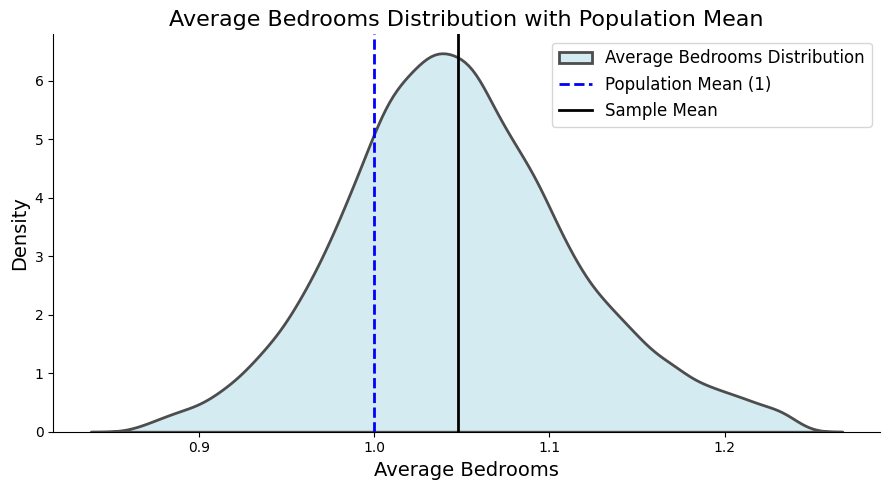


One-Sample T-Test Results for Average Bedrooms:
T-Statistic: 98.30
P-Value: 0.0000
Conclusion: Reject H0. The average number of bedrooms is significantly different from 1.


In [8]:
# Question: Does the average number of bedrooms differ significantly from 1?

# Define the sample data and population mean
sample_data = df['AveBedrms']
population_mean = 1.0

# Hypotheses
print("Hypotheses:")
print("H0: The average number of bedrooms is equal to 1.")
print("HA: The average number of bedrooms is not equal to 1.")

# Visualization: KDE Plot with Population Mean
plt.figure(figsize=(9, 5))
sns.kdeplot(sample_data, fill=True, alpha=0.5, color="lightblue", linewidth=2, edgecolor="0.3", label="Average Bedrooms Distribution")
plt.axvline(population_mean, color="blue", linestyle="--", linewidth=2, label="Population Mean (1)")
plt.axvline(sample_data.mean(), color="k", linestyle="-", linewidth=2, label="Sample Mean")
plt.title("Average Bedrooms Distribution with Population Mean", fontsize=16)
plt.xlabel("Average Bedrooms", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

# Perform the one-sample t-test
t_stat, p_value = ttest_1samp(sample_data, population_mean)

# Print the results
print("\nOne-Sample T-Test Results for Average Bedrooms:")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Conclusion
alpha = 0.05
if p_value <= alpha:
    print("Conclusion: Reject H0. The average number of bedrooms is significantly different from 1.")
else:
    print("Conclusion: Fail to reject H0. The average number of bedrooms is not significantly different from 1.")
